<a href="https://colab.research.google.com/github/mrezap/learning_course/blob/main/Dicoding_Learning_Klasifikasi_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-11-10 03:54:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  8.34MB/s    in 12s     

2020-11-10 03:54:20 (5.52 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
# ekstraksi file zip

import zipfile, os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [ ]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori validasi
val_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori validasi
val_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
# membuat objek pada ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
# persiapan data latih yang akan dipelajari oleh model

train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size = (150, 150), # resize resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 4,
    class_mode = 'binary' # karena merupakan klasifikasi 2 kelas menggunakan binary
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data testing 
    target_size = (150, 150), # resize resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 4,
    class_mode = 'binary' # karena merupakan klasifikasi 2 kelas menggunakan binary
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
# membangun model dengan arsitektur CNN (Convolutional Neural Network)

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# compile model menggunakan Adam optimizer dan lossfunction 'binary_crossentropy'

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit

model.fit(
    train_generator,
    steps_per_epoch = 25, # banyaknya batch yang akan dieksekusi pada setiap epoch
    epochs = 20, # menambah epochs jika akurasi model belum optimal
    validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps = 5, # berapa batch yang akan dieksekusi pada tiap epoch
    verbose = 2)

Epoch 1/20
25/25 - 8s - loss: 0.6551 - accuracy: 0.6000 - val_loss: 0.6138 - val_accuracy: 0.7000
Epoch 2/20
25/25 - 8s - loss: 0.6069 - accuracy: 0.6800 - val_loss: 0.5115 - val_accuracy: 0.8000
Epoch 3/20
25/25 - 8s - loss: 0.6709 - accuracy: 0.5600 - val_loss: 0.6510 - val_accuracy: 0.6500
Epoch 4/20
25/25 - 8s - loss: 0.5299 - accuracy: 0.7400 - val_loss: 0.5193 - val_accuracy: 0.7000
Epoch 5/20
25/25 - 8s - loss: 0.6734 - accuracy: 0.6300 - val_loss: 0.5789 - val_accuracy: 0.6500
Epoch 6/20
25/25 - 8s - loss: 0.5740 - accuracy: 0.7100 - val_loss: 0.6236 - val_accuracy: 0.6000
Epoch 7/20
25/25 - 8s - loss: 0.5211 - accuracy: 0.7100 - val_loss: 0.5123 - val_accuracy: 0.7000
Epoch 8/20
25/25 - 8s - loss: 0.5221 - accuracy: 0.6900 - val_loss: 0.5640 - val_accuracy: 0.7000
Epoch 9/20
25/25 - 8s - loss: 0.5114 - accuracy: 0.7100 - val_loss: 0.5489 - val_accuracy: 0.7000
Epoch 10/20
25/25 - 8s - loss: 0.6450 - accuracy: 0.6300 - val_loss: 0.6388 - val_accuracy: 0.6000
Epoch 11/20
25/25 -

Saving kamar02.jpg to kamar02.jpg
kamar02.jpg
clean


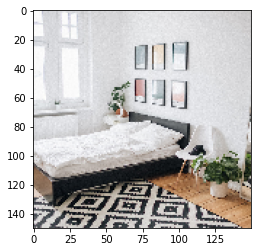

In [ ]:
# prediksi model

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes == 0 :
      print('clean')
  else :
      print('messy')